## Objective:
    This project aims at predicting the hotel of guests prefer during bookings.

### 1. Loading the required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns

%matplotlib inline

### 2. Loading the dataset

In [2]:
df = pd.read_csv('D:\Data Projects\Practice Files\hosdat1 (2).csv')

### 3. Exploring the dataset

In [3]:
## checking the shape of the dataset

df.shape

(81560, 28)

In [4]:
## checking on more information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81560 entries, 0 to 81559
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81560 non-null  object 
 1   is_canceled                     81560 non-null  object 
 2   lead_time                       81560 non-null  int64  
 3   arrival_date_year               81560 non-null  int64  
 4   arrival_date_month              81560 non-null  object 
 5   arrival_date_week_number        81560 non-null  int64  
 6   arrival_date_day_of_month       81560 non-null  int64  
 7   stays_in_weekend_nights         81560 non-null  int64  
 8   stays_in_week_nights            81560 non-null  int64  
 9   adults                          81560 non-null  int64  
 10  children                        81560 non-null  int64  
 11  babies                          81560 non-null  int64  
 12  meal                            

In [5]:
## getting summary statistics of the dataset

df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000,81560.000000
mean,79.822621,2016.215976,26.798847,15.804144,1.015645,2.648860,1.883166,0.140706,0.010949,0.036513,0.031020,0.185777,0.268306,0.654941,107.457670,0.085581,0.705260
std,85.662039,0.684257,13.657765,8.841075,1.028786,2.039972,0.628196,0.459138,0.114819,0.187564,0.376603,1.755836,0.710809,9.373664,54.671298,0.283707,0.833977
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,1.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,0.000000,1.000000
max,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
## obtaining the last 7 rows of the dataset

df.tail(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
81553,City Hotel,notdefault,164,2017,August,35,31,2,4,2,...,0,A,0,No Deposit,Other_ag,0,Transient,87.60,0,0
81554,City Hotel,notdefault,21,2017,August,35,30,2,5,2,...,0,A,0,No Deposit,Other_ag,0,Transient,96.14,0,2
81555,City Hotel,notdefault,23,2017,August,35,30,2,5,2,...,0,A,0,No Deposit,Other_ag,0,Transient,96.14,0,0
81556,City Hotel,notdefault,102,2017,August,35,31,2,5,3,...,0,E,0,No Deposit,9,0,Transient,225.43,0,2
81557,City Hotel,notdefault,34,2017,August,35,31,2,5,2,...,0,D,0,No Deposit,9,0,Transient,157.71,0,4
81558,City Hotel,notdefault,109,2017,August,35,31,2,5,2,...,0,A,0,No Deposit,Other_ag,0,Transient,104.40,0,0
81559,City Hotel,notdefault,205,2017,August,35,29,2,7,2,...,0,A,0,No Deposit,9,0,Transient,151.20,0,2


In [7]:
## getting more descriptive information on the numeric columns in the dataset

numeric_df = df.drop(columns = ["hotel", "is_canceled", "arrival_date_month", "deposit_type", "agent", "customer_type", 
                               "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", 
                                "deposit_type", "agent"])

from scipy.stats import describe

description = describe(numeric_df)

for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 81560
minmax : (array([ 0.000e+00,  2.015e+03,  1.000e+00,  1.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -6.380e+00,
        0.000e+00,  0.000e+00]), array([7.090e+02, 2.017e+03, 5.300e+01, 3.100e+01, 1.900e+01, 5.000e+01,
       5.500e+01, 1.000e+01, 1.000e+01, 1.000e+00, 2.600e+01, 7.200e+01,
       1.800e+01, 3.910e+02, 5.400e+03, 8.000e+00, 5.000e+00]))
mean : [7.98226214e+01 2.01621598e+03 2.67988475e+01 1.58041442e+01
 1.01564492e+00 2.64885974e+00 1.88316577e+00 1.40706229e-01
 1.09489946e-02 3.65129966e-02 3.10201079e-02 1.85777342e-01
 2.68305542e-01 6.54941148e-01 1.07457670e+02 8.55811672e-02
 7.05259931e-01]
variance : [7.33798486e+03 4.68208086e-01 1.86534532e+02 7.81646097e+01
 1.05839990e+00 4.16148670e+00 3.94630716e-01 2.10807579e-01
 1.31833709e-02 3.51802290e-02 1.41830075e-01 3.08295960e+00
 5.05249817e-01 8.78655698e+01 2.98895083e+03 8.04895040e-02
 6.9551788

### 4. Cleaning the dataset

#### Checking for any null values 

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Checking for any duplicates

In [9]:
df.duplicated().sum()

203

#### Dropping the duplicated values 

In [10]:
df1 = df.drop_duplicates()

#### Confirming if there are any duplicates

In [11]:
df1.duplicated().sum()

0

#### Checking for any outliers

<Axes: >

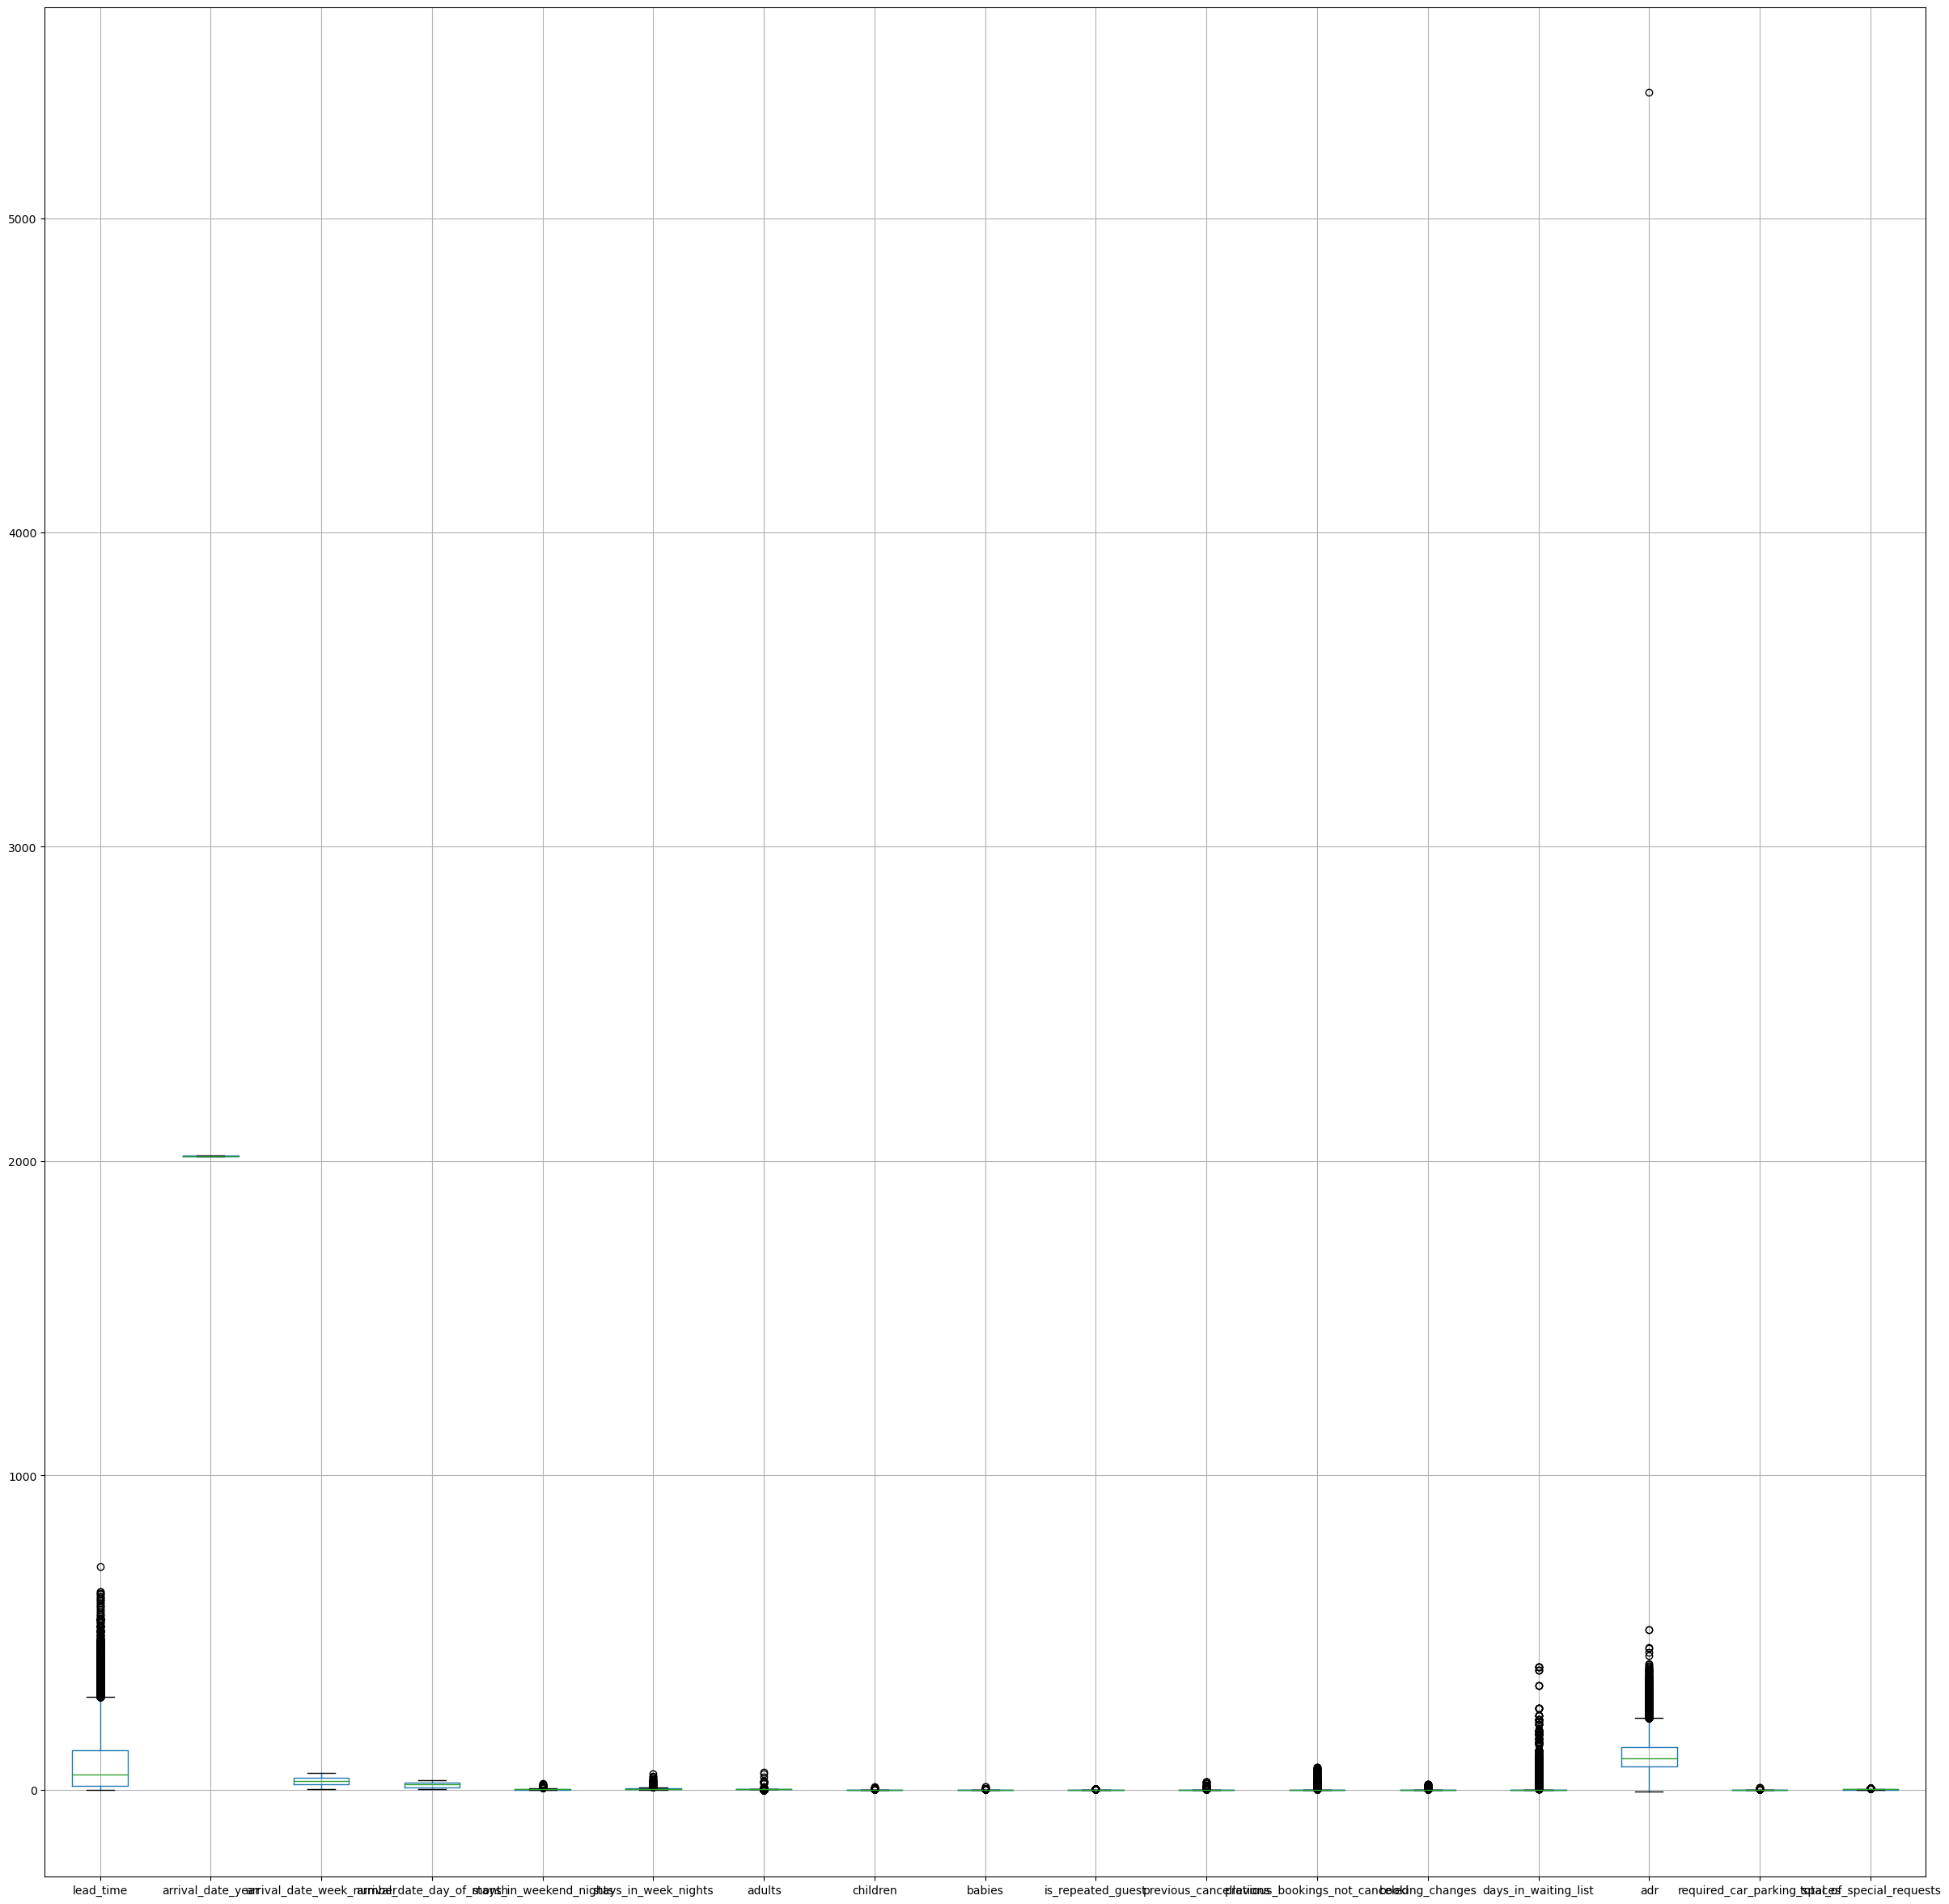

In [12]:
plt.figure(figsize = (30,30)) ## chose this size due to the long column names
df1.boxplot()

#### Dealing with outiers in the adr column

In [14]:
## getting the interquartile range (iqr)

q1 = df1["adr"].quantile(0.25)
q3 = df1["adr"].quantile(0.75)

iqr = q3 - q1

# calculating the upper and lower limits
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

# extracting the outliers
df1.loc[(df1["adr"] > upper_limit) | (df1["adr"] < lower_limit)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
358,Resort Hotel,notdefault,317,2015,July,29,14,1,5,2,...,0,H,1,No Deposit,240,0,Transient,230.67,1,2
466,Resort Hotel,notdefault,0,2015,July,29,18,0,1,2,...,0,C,0,No Deposit,Unknown,0,Transient,249.00,0,0
469,Resort Hotel,notdefault,73,2015,July,29,18,2,5,2,...,0,D,0,No Deposit,Unknown,0,Transient,241.50,0,2
514,Resort Hotel,default,28,2015,July,30,20,2,5,2,...,0,F,0,No Deposit,Unknown,0,Transient,240.64,0,0
563,Resort Hotel,default,22,2015,July,30,24,0,2,2,...,0,G,0,No Deposit,240,0,Transient,233.00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81397,City Hotel,notdefault,29,2017,August,35,27,2,1,2,...,0,F,0,No Deposit,9,0,Transient,233.00,0,0
81445,City Hotel,notdefault,140,2017,August,35,27,2,3,2,...,0,F,0,No Deposit,9,0,Transient,235.00,0,0
81471,City Hotel,notdefault,25,2017,August,35,30,0,3,3,...,0,E,1,No Deposit,9,0,Transient,236.33,0,3
81518,City Hotel,notdefault,110,2017,August,35,29,0,5,3,...,0,D,1,No Deposit,14,0,Transient,229.00,0,1


In [15]:
# removing the outliers and storing the cleaned dataset in a new variable
df2 = df1.loc[(df1["adr"] < upper_limit) & (df1["adr"] > lower_limit)]

print("Before removing outliers:", len(df1))
print("After removing outliers:", len(df2))
print("Outliers:", len(df1) - len(df2))

Before removing outliers: 81357
After removing outliers: 79006
Outliers: 2351


#### Dealing with the outliers in the lead time column

In [16]:
## getting the interquartile range (iqr)

q1 = df2["lead_time"].quantile(0.25)
q3 = df2["lead_time"].quantile(0.75)

iqr = q3 - q1

# calculating the upper and lower limits
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

# extracting the outliers
df2.loc[(df2["lead_time"] > upper_limit) | (df2["lead_time"] < lower_limit)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
68,Resort Hotel,default,368,2015,July,27,3,3,7,2,...,0,A,0,No Deposit,Other_ag,0,Contract,55.68,0,0
69,Resort Hotel,notdefault,364,2015,July,27,3,3,7,2,...,0,A,0,No Deposit,Other_ag,0,Contract,55.68,0,0
72,Resort Hotel,notdefault,324,2015,July,27,3,4,10,2,...,0,E,0,No Deposit,Other_ag,0,Contract,134.73,0,0
199,Resort Hotel,notdefault,394,2015,July,28,8,2,5,2,...,0,D,0,No Deposit,Other_ag,0,Contract,89.68,0,0
217,Resort Hotel,notdefault,366,2015,July,28,9,2,5,2,...,0,E,0,No Deposit,Other_ag,0,Contract,134.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81394,City Hotel,notdefault,457,2017,August,34,25,2,3,2,...,0,A,2,No Deposit,Other_ag,0,Transient-Party,122.40,0,1
81435,City Hotel,notdefault,341,2017,August,35,27,2,3,2,...,0,D,0,No Deposit,Other_ag,0,Transient,96.91,0,1
81478,City Hotel,notdefault,303,2017,August,35,29,0,4,1,...,0,A,0,No Deposit,9,0,Transient,102.38,0,2
81479,City Hotel,notdefault,332,2017,August,35,31,0,2,2,...,0,D,4,No Deposit,9,0,Transient,170.80,0,2


In [17]:
# removing the outliers and storing the cleaned dataset in a new variable
df3 = df2.loc[(df2["lead_time"] < upper_limit) & (df2["lead_time"] > lower_limit)]

print("Before removing outliers:", len(df2))
print("After removing outliers:", len(df3))
print("Outliers:", len(df2) - len(df3))

Before removing outliers: 79006
After removing outliers: 76810
Outliers: 2196


##### N/B: For this dataset, I focused on the outliers in the lead time and adr columns

### 5. Analyzing and Visualizing the dataset

In [18]:
hotels = df3.copy()

In [19]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,notdefault,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,Unknown,0,Transient,75.0,0,0
1,Resort Hotel,notdefault,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,Other_ag,0,Transient,75.0,0,0
2,Resort Hotel,notdefault,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,240,0,Transient,98.0,0,1
3,Resort Hotel,notdefault,9,2015,July,27,1,0,2,2,...,0,C,0,No Deposit,Other_ag,0,Transient,103.0,0,1
4,Resort Hotel,default,85,2015,July,27,1,0,3,2,...,0,A,0,No Deposit,240,0,Transient,82.0,0,1


#### Checking for the correlations between variables

Text(0.0, 1.0, 'Relationships Between Variables.')

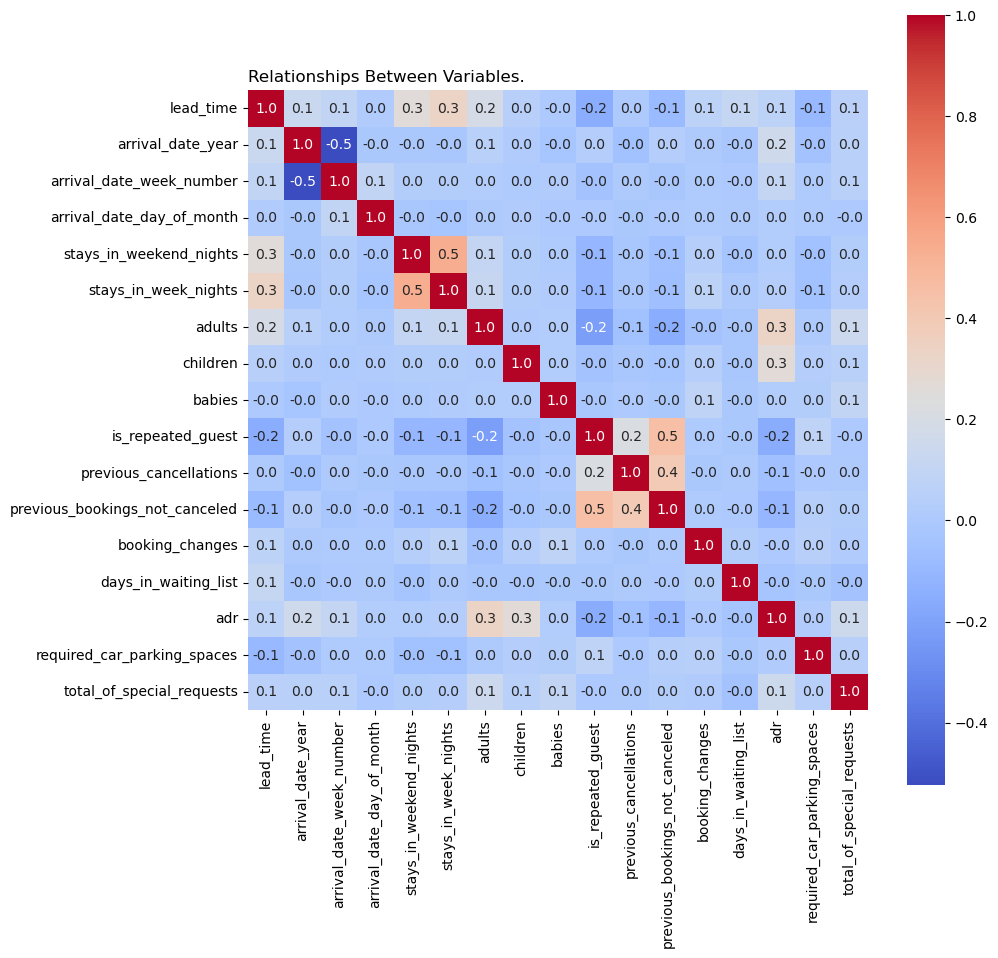

In [20]:
numeric_hotels = hotels.drop(columns = ["hotel", "is_canceled", "arrival_date_month", "deposit_type", "agent", "customer_type", 
                               "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", 
                                "deposit_type", "agent"])

correlation = numeric_hotels.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot=True, annot_kws={"size" : 10}, cbar=True, square=True, fmt=".1f", cmap="coolwarm")
plt.title("Relationships Between Variables.", loc = "left")

#### Checking which hotel had the highest number of week in nights

Text(0.5, 1.0, 'Week In Nights per Hotel')

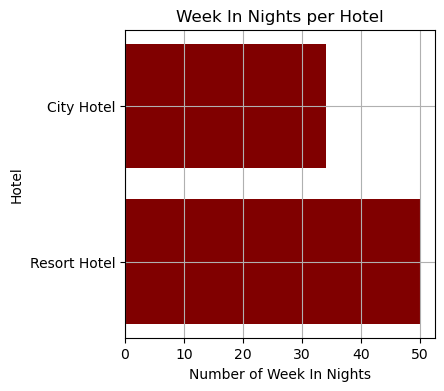

In [23]:
plt.figure(figsize = (4,4))
plt.barh(hotels["hotel"], hotels["stays_in_week_nights"], color = "maroon")
plt.xlabel("Number of Week In Nights")
plt.ylabel("Hotel")
plt.grid(True)
plt.title("Week In Nights per Hotel", loc = "center")

#### Checking which month had the highest lead time

Text(0.5, 1.0, 'Lead Time Distribution per Month')

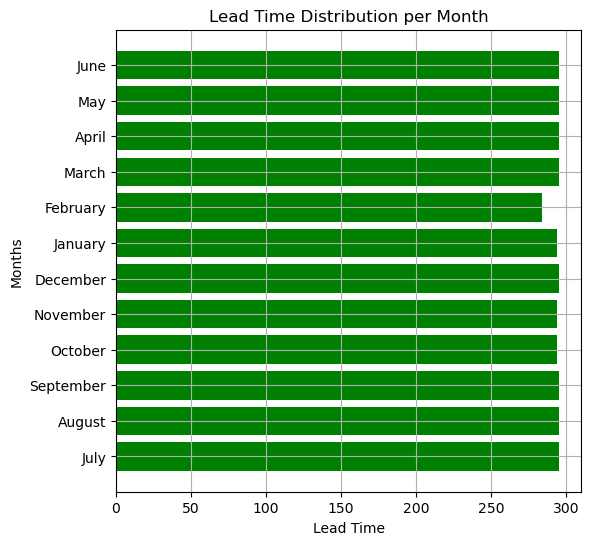

In [25]:
plt.figure(figsize = (6,6))
plt.barh(hotels["arrival_date_month"], hotels["lead_time"], color = "green")
plt.xlabel("Lead Time")
plt.ylabel("Months")
plt.grid(True)
plt.title("Lead Time Distribution per Month", loc = "center")

#### Checking the status of cancelations per year

Text(0.5, 1.0, 'Status of Cancelations per Year')

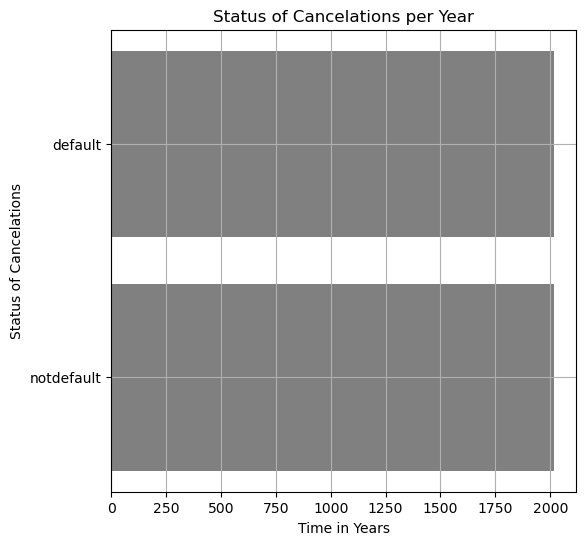

In [27]:
plt.figure(figsize = (6,6))
plt.barh(hotels["is_canceled"], hotels["arrival_date_year"], color = "grey")
plt.xlabel("Time in Years")
plt.ylabel("Status of Cancelations")
plt.grid(True)
plt.title("Status of Cancelations per Year", loc = "center")

### 6. Building the Hotel Prediction Model

In [31]:
hotels.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
81558,City Hotel,notdefault,109,2017,August,35,31,2,5,2,...,0,A,0,No Deposit,Other_ag,0,Transient,104.4,0,0
81559,City Hotel,notdefault,205,2017,August,35,29,2,7,2,...,0,A,0,No Deposit,9,0,Transient,151.2,0,2


In [34]:
# indexing the hotels :
# City Hotel is represented by 1
# Resort Hotel is represented by 2

hotels["hotel"] = hotels["hotel"].replace({
    "City Hotel" : 1,
    "Resort Hotel" : 2
})

In [35]:
hotels.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,2,notdefault,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,Unknown,0,Transient,75.0,0,0
1,2,notdefault,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,Other_ag,0,Transient,75.0,0,0


In [36]:
hotel = hotels.drop(columns = ["is_canceled", "arrival_date_month", "deposit_type", "agent", "customer_type", "meal", "country", 
                              "market_segment", "distribution_channel", "reserved_room_type"])

#### 1. Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [38]:
## selecting the dependent and independent variable

X = hotel.drop(["hotel"], axis = 1) #i.v
y = hotel["hotel"] # d.v

In [39]:
## deviding the dataset into training and testing splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [40]:
## Loading the regression model

log_reg = LogisticRegression()

In [41]:
## fitting the model to the dataset

log_reg.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
## predicting the model values

model_pred = log_reg.predict(X_test)
model_pred

array([2, 1, 1, ..., 2, 1, 1], dtype=int64)

In [46]:
## getting the accuracy of the model using the confusion matrix

confusion_matrix(model_pred, y_test)

array([[12867,  5726],
       [ 1517,  2933]], dtype=int64)

In [47]:
print("Percentage Accuracy:", ((12867 + 2933) / (12867 + 5726 + 1517 + 2933)))

Percentage Accuracy: 0.6856746083409279


In [48]:
## getting the accuracy of the model using the accuracy score method

accuracy_score(model_pred, y_test)

0.6856746083409279

#### Conclusion:
    The model has an accuracy score of 68% therefore it fairly predicts the choice of hotel type selection.